Рассмотрим датасет по различным странам и их годам с классификацией статуса экономики и средней продолжительностью жизни.
Попробуем сделать модель линейной регрессии на предсказание средней продолжительности жизни и модель логистической регрессии на  бинарную классификацию по статусу экономики страны.

Данный датасет можно найти по ссылке: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated

В нем содержатся такие признаки как:

* Country	- Страна (всего 179 стран)
* Region - Регион
* Year - Год
* Infant_deaths - Смерти в младенчестве на 1000 населения
* Under_five_deaths - Смерти до пяти лет на 1000 населения
* Adult_mortality	- Взрослая смертность на 1000 населения
* Alcohol_consumption	- Потребление алкоголя, зарегистрированное в литрах чистого алкоголя на душу населения в возрасте 15+ лет.
* Hepatitis_B	- Представляет % охвата иммунизацией против гепатита B (HepB3) среди детей в возрасте 1 года.
* Measles	- Представляет % охвата иммунизацией первой дозой противокоревой вакцины (MCV1) среди детей в возрасте 1 года.
* BMI	- Это показатель состояния питания у взрослых. Он определяется как вес человека в килограммах, деленный на квадрат роста этого человека в метрах (кг/м2).
* Polio - Представляет собой % охвата прививками от полиомиелита (Pol3) среди детей в возрасте 1 года.
* Diphtheria - Представляет % охвата иммунизацией от дифтерийно-столбнячного анатоксина и коклюша (АКДС3) среди детей в возрасте 1 года.
* Incidents_HIV - Заболеваемость ВИЧ на 1000 населения в возрасте 15-49 лет
* GDP_per_capita - ВВП на душу населения в текущих долларах США
* Population_mln - Общая численность населения в миллионах
* Thinness_ten_nineteen_years - Распространенность худобы среди подростков 10-19 лет. BMI < -2 стандартных отклонения ниже медианы.
* Thinness_five_nine_years - Распространенность худобы среди детей 5-9 лет. BMI < -2 стандартных отклонения ниже медианы.
* Schooling	- Среднее количество лет, которые люди в возрасте 25+ потратили на образование
* Economy_status_Developed - Развитая в плане экономике страна
* Economy_status_Developing - Развивающаяся в плане экономике страна
* Life_expectancy - Средняя продолжительность жизни обоих полов в разные годы с 2000 по 2015 гг.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')

In [3]:
df.shape

(2864, 21)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Ради интереса посмотрим данные по России, а затем рейтинг стран по уровню образования (худшие и лучшие).

In [6]:
df[df['Country']=='Russian Federation'].sort_values(by = 'Year', ascending=True)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
1852,Russian Federation,Rest of Europe,2000,15.5,19.3,300.6055,10.21,73,86,25.7,97,96,0.08,5324,146.60,2.9,3.0,11.3,0,1,65.5
1439,Russian Federation,Rest of Europe,2001,14.7,18.3,307.7435,10.47,43,88,25.8,97,96,0.08,5619,145.98,2.8,3.0,11.4,0,1,65.4
1773,Russian Federation,Rest of Europe,2002,13.8,17.2,316.4570,10.87,81,93,25.8,97,97,0.08,5910,145.31,2.7,2.9,11.4,0,1,65.1
2326,Russian Federation,Rest of Europe,2003,12.9,16.1,323.8525,11.32,94,96,25.9,97,96,0.08,6370,144.65,2.6,2.8,11.4,0,1,65.0
90,Russian Federation,Rest of Europe,2004,12.0,14.9,317.9670,11.50,96,97,25.9,98,97,0.08,6857,144.07,2.5,2.8,11.4,0,1,65.5
1761,Russian Federation,Rest of Europe,2005,11.1,13.8,318.6295,11.59,97,97,26.0,98,98,0.08,7323,143.52,2.4,2.7,11.4,0,1,65.5
582,Russian Federation,Rest of Europe,2006,10.3,12.8,292.2095,11.83,98,97,26.0,98,98,0.08,7950,143.05,2.4,2.7,11.4,0,1,66.7
1934,Russian Federation,Rest of Europe,2007,9.6,11.9,273.8320,12.24,98,97,26.0,98,98,0.08,8640,142.81,2.4,2.6,11.4,0,1,67.6
1894,Russian Federation,Rest of Europe,2008,9.0,11.2,270.0240,12.09,98,97,26.1,98,98,0.08,9094,142.74,2.3,2.5,11.4,0,1,67.9
2187,Russian Federation,Rest of Europe,2009,8.6,10.7,254.1490,11.25,98,97,26.1,98,98,0.08,8382,142.79,2.3,2.5,11.5,0,1,68.7


In [14]:
df.groupby(['Country'])[['Alcohol_consumption']].mean().sort_values(by = 'Alcohol_consumption', ascending=False).head(30)

,Alcohol_consumption
Country,
Estonia,15.100000
Czechia,13.304375
Lithuania,12.983750
France,12.824375
Belarus,12.569375
Ireland,12.317500
Austria,12.226875
Luxembourg,12.149375
Hungary,12.063750


In [15]:
df.groupby(['Country'])[['Schooling']].mean().sort_values(by = 'Schooling', ascending=True).head(30)

,Schooling
Country,
Burkina Faso,1.33750
Niger,1.40000
Chad,1.75000
Mali,1.80625
Guinea,1.83750
Ethiopia,2.09375
Somalia,2.10000
"Yemen, Rep.",2.22500
Burundi,2.41250


In [16]:
df.groupby(['Country'])[['Schooling']].mean().sort_values(by = 'Schooling', ascending=False).head(30)

,Schooling
Country,
Germany,13.26875
United States,13.01250
Switzerland,12.60625
Denmark,12.51250
United Kingdom,12.48750
Norway,12.48750
Israel,12.46875
Canada,12.26875
Estonia,12.24375


Перейдем к обработке датасета.

In [17]:
df.isnull().sum() #Проверяем на пропуски

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [18]:
df.duplicated().sum()

0

В данных нету пропусков b дубликатов. При наличии выбросов будет нерационально удалять строки с ними, так как каждая комбинация Страна-Год уникальна.

Можно удалить один из признаков со статусом экономики, так как они напрямую взаимосвязаны. Оставим столбец, обозначающим развитую экономику.

In [19]:
df.drop('Economy_status_Developing', axis = 1, inplace = True)

In [20]:
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,399,11.33,12.8,12.9,1.1,0,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,2515,2.67,2.2,2.3,9.1,0,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,2130,19.39,15.4,15.5,10.3,0,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,7424,3.44,3.3,3.3,11.1,1,71.8


Здесь достаточно сложно придумать новые признаки. Тем более, что имеющихся уже достаточно много для задачи машинного обучения. Можно было бы брать некоторые пороговые значения, которые бы разделяли, к примеру, сильное употребление алкоголя/слабое. Сделаем подобное для признака Schooling, взяв за оптимальное значение 11 лет.

In [21]:
df['Schooling>=7.6'] = df.Schooling

In [22]:
def nice_school(y):
    if y >= 7.6:
        return 1
    else:
        return 0

In [23]:
df['Schooling>=7.6'] = df.Schooling.apply(nice_school)

In [24]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Schooling>=7.6
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5,1
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8,1
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4,0
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,67.0,1
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,81.7,1


У нас имеется 179 различных стран. Если переводить их каиегориальные переменные, то будет слишком много новых признаков, поэтому попробуем обойтись без этого столбца. К тому же, без него получится обрабатывать страны, которых изначально не было в нашем датасете.

In [25]:
df.drop('Country', axis = 1, inplace = True)

In [26]:
df.head()

,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Schooling>=7.6
0,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5,1
1,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8,1
2,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4,0
3,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,67.0,1
4,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,81.7,1


In [27]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Schooling>=7.6
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,68.856075,0.530377
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,9.405608,0.499164
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,39.400000,0.000000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,62.700000,0.000000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,71.400000,1.000000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,75.400000,1.000000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,83.800000,1.000000


В принципе, со временем экономика прогрессирует в той или иной степени, поэтому можно оставить его в качестве вещественного признака, но понизить размерность, вычтя, к примеру, 1970 (чтобы увеличить влияние года на целевую переменную, но не очень существенно, поэтому вычтем не 2000, а ~ 2000-(max-min)*2).

In [28]:
df.Year = df.Year-1970

In [29]:
df.head()

,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Schooling>=7.6
0,Middle East,45,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5,1
1,European Union,45,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8,1
2,Asia,37,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4,0
3,South America,36,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,67.0,1
4,Middle East,42,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,81.7,1


In [30]:
df.corr()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Schooling>=7.6
Year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-1.231876e-16,0.174359,0.116634
Infant_deaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,-0.920032,-0.676475
Under_five_deaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,-0.920419,-0.653265
Adult_mortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,-0.945360,-0.526415
Alcohol_consumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,0.399159,0.527187
Hepatitis_B,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,0.417804,0.329737
Measles,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,0.490019,0.446475
BMI,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,0.598423,0.558726
Polio,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,0.641217,0.490827
Diphtheria,1.451429e-01,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,2.894172e-01,0.627541,0.472043


Если с привиками от болезней в детстве и "показателем сытости" корреляция достаточно понятна, то момент с наиболее высокой корреляцией между годами обучения и продолжительностью жизни для меня стал внезапным. 

''

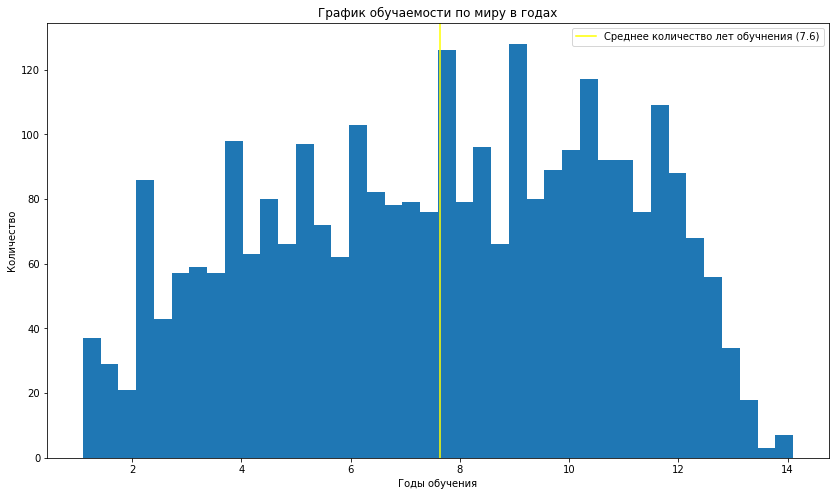

In [31]:
plt.figure(figsize = (14,8))
plt.hist(df.Schooling, bins = 40)
plt.axvline(df.Schooling.mean(), c = 'yellow', label = f'Среднее количество лет обучнения ({round(df.Schooling.mean(),1)})')
plt.title('График обучаемости по миру в годах')
plt.xlabel('Годы обучения')
plt.ylabel('Количество')
plt.legend()
;

''

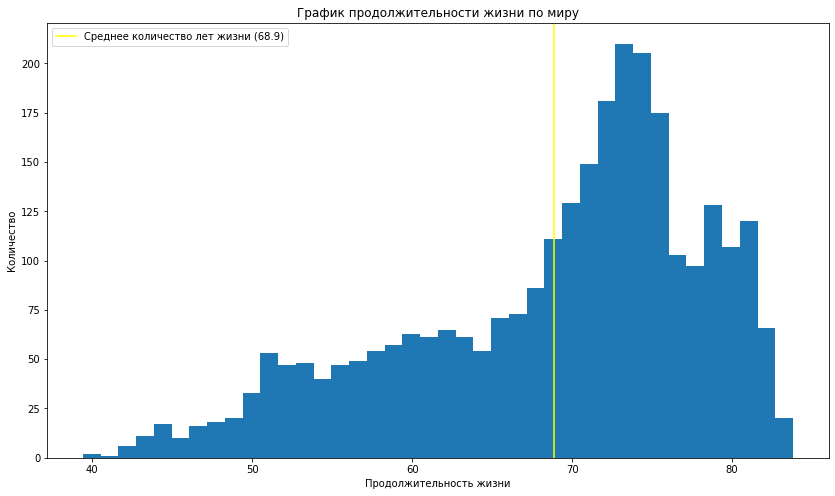

In [32]:
plt.figure(figsize = (14,8))
plt.hist(df.Life_expectancy, bins = 40)
plt.axvline(df.Life_expectancy.mean(), c = 'yellow', label = f'Среднее количество лет жизни ({round(df.Life_expectancy.mean(),1)})')
plt.title('График продолжительности жизни по миру')
plt.xlabel('Продолжительность жизни')
plt.ylabel('Количество')
plt.legend()
;
;

''

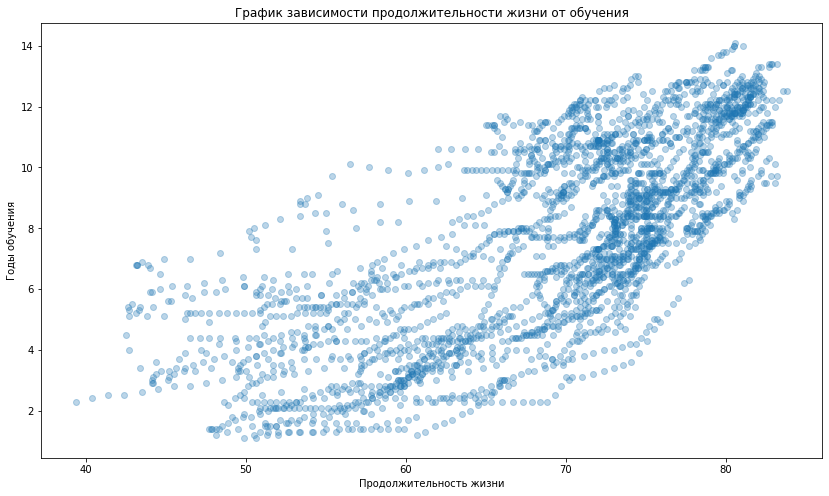

In [33]:
plt.figure(figsize = (14,8))
plt.scatter(df.Life_expectancy,df.Schooling,alpha = 0.3)
plt.title('График зависимости продолжительности жизни от обучения')
plt.xlabel('Продолжительность жизни')
plt.ylabel('Годы обучения')
;

In [34]:
df.head()

,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Schooling>=7.6
0,Middle East,45,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5,1
1,European Union,45,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8,1
2,Asia,37,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4,0
3,South America,36,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,67.0,1
4,Middle East,42,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,81.7,1


Перед обучением модели закодируем признак региона через OneHotEncoder. Также у нас достаточно большой разброс в масштабе между некоторыми признаками (более, чем в 100 раз), поэтому приведем все к единому масштабу через StandardScaler.

In [35]:
df1 = pd.get_dummies(df, drop_first = True)

In [36]:
df1.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Schooling>=7.6,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,45,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5,1,0,0,0,1,0,0,0,0
1,45,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8,1,0,0,1,0,0,0,0,0
2,37,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4,0,1,0,0,0,0,0,0,0
3,36,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,67.0,1,0,0,0,0,0,0,0,1
4,42,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,81.7,1,0,0,0,1,0,0,0,0


Начнем с задачи регрессии для предсказания срока жизни. Попробуем модель линейной регрессии и деревья решений.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
X = df1.drop('Life_expectancy',axis = 1)
y = df1['Life_expectancy']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42)

In [40]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X.columns)

In [41]:
X_train.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Schooling>=7.6,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,0.941834,-0.966441,-0.866116,-1.212925,1.260846,0.237353,0.469646,0.036305,0.627156,0.624293,-0.360321,4.106017,-0.212137,-0.979661,-1.013423,1.793590,1.947984,0.931572,-0.419163,-0.338653,-0.422229,-0.286559,-0.137751,-0.254849,3.296574,-0.276933
1,0.299389,-0.735243,-0.701339,-0.802149,-1.089477,0.848957,1.174304,0.399439,0.627156,0.751781,-0.364625,0.558725,-0.249055,0.464477,0.429570,0.011123,-0.513351,0.931572,-0.419163,-0.338653,-0.422229,3.489687,-0.137751,-0.254849,-0.303345,-0.276933
2,-0.985501,2.133056,1.999668,2.331324,-0.048512,-1.291658,-0.722852,-0.962313,-1.220036,-1.606745,0.866425,-0.591533,-0.142916,0.599865,0.584969,-1.302275,-0.513351,-1.073455,-0.419163,-0.338653,-0.422229,-0.286559,-0.137751,-0.254849,-0.303345,-0.276933
3,1.584280,-0.948379,-0.852755,-0.284734,1.494122,0.604315,0.794873,0.717181,0.495213,0.560549,-0.261320,0.115068,-0.255545,-0.596062,-0.613825,1.605962,1.947984,0.931572,-0.419163,-0.338653,2.368381,-0.286559,-0.137751,-0.254849,-0.303345,-0.276933
4,0.299389,-0.482370,-0.536562,-0.466186,-0.219080,0.543155,1.011690,0.444830,0.495213,0.433061,-0.351712,-0.515374,-0.248983,-0.641191,-0.613825,1.074349,-0.513351,0.931572,-0.419163,-0.338653,-0.422229,-0.286559,-0.137751,-0.254849,3.296574,-0.276933


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [43]:
lr = LinearRegression()
lr_ = lr.fit(X_train,y_train)
print(' Train MSE =',round(MSE(lr_.predict(X_train),y_train),2),'\n',
        'Train R2_score =', round(R2(lr_.predict(X_train),y_train),2) )

 Train MSE = 1.4 
 Train R2_score = 0.98


На тренировочной выборке очень хороший результат, теперь посмотрим на тестовой выборке.

In [44]:
lr_pred = lr_.predict(X_test)
print(' Test MSE =',round(MSE(lr_pred,y_test),2),'\n',
        'Test R2_score =', round(R2(lr_pred,y_test),2) )

 Test MSE = 1.44 
 Test R2_score = 0.98


Простой линейной регрессией мы получили очень хороший результат на тесте, скорее всего засчет хорошей обработки признаков, поэтому здесь можно обойтись без случайного леса.

Посмотрим влияние весов на конечный результат.

''

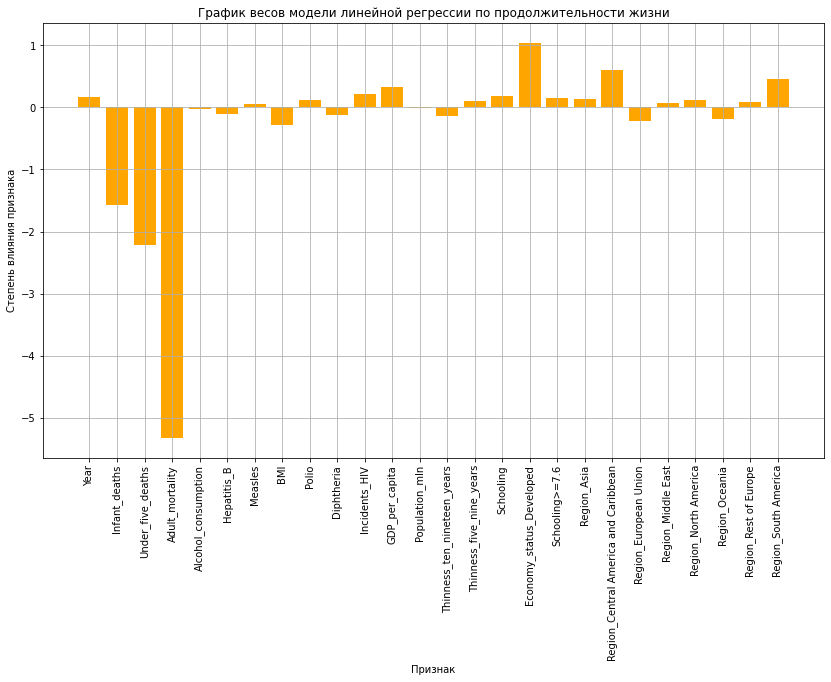

In [45]:
plt.figure(figsize = (14,8))
plt.bar(lr_.feature_names_in_,lr_.coef_, color = 'orange')
plt.xticks(rotation = 90)
plt.grid(True)
plt.title('График весов модели линейной регрессии по продолжительности жизни')
plt.xlabel('Признак')
plt.ylabel('Степень влияния признака')
;

Из очевидного - признак количества смертей сильно влияет на значения продолжительности жизни. В остальном можно сказать, что статус экономики также играет важную роль. Интересно, что самые значимые регионы Центральная Америка и Южная Африка, что говорит о достаточном влиянии одних этих признаков даже без учета остальных.

------------------------------------------------------------------------

Теперь попробуем сделать предсказания статуса экономики по нашим признакам при логистической регрессии либо случайного леса.

In [46]:
df1.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Life_expectancy,Schooling>=7.6,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,45,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5,1,0,0,0,1,0,0,0,0
1,45,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8,1,0,0,1,0,0,0,0,0
2,37,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,65.4,0,1,0,0,0,0,0,0,0
3,36,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,67.0,1,0,0,0,0,0,0,0,1
4,42,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,81.7,1,0,0,0,1,0,0,0,0


In [47]:
X = df1.drop('Economy_status_Developed',axis = 1)
y = df1['Economy_status_Developed']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42)

In [49]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X.columns)

In [50]:
X_test.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Schooling>=7.6,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,-0.343056,-0.587132,-0.592230,-0.141914,1.248304,0.726636,0.307032,0.989531,0.495213,0.560549,-0.132189,1.391739,-0.267442,-0.528368,-0.525025,1.011806,0.338299,0.931572,-0.419163,2.952873,-0.422229,-0.286559,-0.137751,-0.254849,-0.303345,-0.276933
1,1.370131,-0.962828,-0.863889,-1.079727,1.155495,0.237353,0.469646,0.944139,0.561184,0.560549,-0.351712,1.896752,0.195980,-0.911967,-0.969023,1.574691,1.320723,0.931572,-0.419163,-0.338653,-0.422229,-0.286559,-0.137751,-0.254849,3.296574,-0.276933
2,-1.199650,0.630270,0.616877,0.212819,0.272556,-0.863535,-0.343421,-0.599179,0.363271,0.369317,0.078725,-0.619291,-0.268740,0.622429,0.607169,-1.052104,-0.644125,-1.073455,-0.419163,2.952873,-0.422229,-0.286559,-0.137751,-0.254849,-0.303345,-0.276933
3,-1.627947,1.966882,2.082056,0.807533,-0.853692,-0.680054,0.307032,-1.325447,-0.560324,-0.523098,0.057203,-0.629758,-0.220285,1.096287,1.051167,-1.583717,-1.415276,-1.073455,-0.419163,-0.338653,-0.422229,-0.286559,-0.137751,-0.254849,-0.303345,-0.276933
4,-0.771353,-0.948379,-0.854982,-0.986213,1.067703,0.481994,-0.018194,0.853356,0.561184,0.560549,-0.368930,0.596892,-0.190794,-0.911967,-0.902423,0.605278,1.077758,0.931572,-0.419163,-0.338653,2.368381,-0.286559,-0.137751,-0.254849,-0.303345,-0.276933


In [51]:
y[:5]

0    0
1    1
2    0
3    0
4    1
Name: Economy_status_Developed, dtype: int64

In [52]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV as GS

from sklearn.metrics import accuracy_score, f1_score

In [53]:
log_reg = LogisticRegression()
log_reg_ = log_reg.fit(X_train, y_train)

In [54]:
print(' Train Accuracy =',round(accuracy_score(log_reg_.predict(X_train),y_train),2),'\n',
        'Train F1 score =', round(f1_score(log_reg_.predict(X_train),y_train),2) )

 Train Accuracy = 1.0 
 Train F1 score = 1.0


Обе метрики показывают идеальный результат. Похоже на переобучение, так что теперь проверим на тесте.

In [55]:
log_reg_pred = log_reg_.predict(X_test)
print(' Test Accuracy =',round(accuracy_score(log_reg_pred,y_test),4),'\n',
        'Test F1 score =', round(f1_score(log_reg_pred,y_test),4) )

 Test Accuracy = 1.0 
 Test F1 score = 1.0


Как не странно, но результат получился идеальный, поэтому здесь также можно обойтись без случайного леса и подбора гиперпараметров для него.

Посмотрим влияние весов на конечный результат.

''

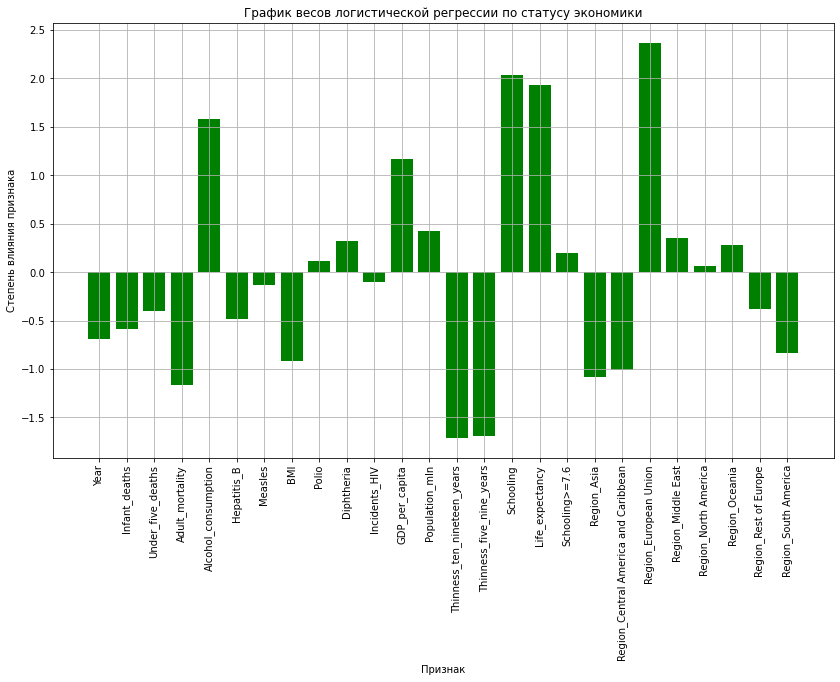

In [57]:
plt.figure(figsize = (14,8))
plt.bar(log_reg_.feature_names_in_, log_reg_.coef_[0], color = 'green')
plt.xticks(rotation = 90)
plt.grid(True)
plt.title('График весов логистической регрессии по статусу экономики')
plt.xlabel('Признак')
plt.ylabel('Степень влияния признака')
;

Здесь наиболее значимые факторы для экономики становятся потребление алкоголя, уровень питания, а также регион (в частности Европейский).

In [58]:
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [59]:
params = {'n_estimators':[10,30,50,100], 'max_depth':range(3,8),'min_samples_leaf':[1,4,10]}
rf = RandomForestClassifier()
gs_ = GS(
    estimator = rf,
    param_grid = params,
    scoring='f1',
    n_jobs=-1,
    cv=5,
    verbose=1,
    )

In [60]:
gs_.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 8),
                         'min_samples_leaf': [1, 4, 10],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='f1', verbose=1)

In [61]:
pd.DataFrame(gs_.cv_results_).sort_values(by='rank_test_score',ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.026424,0.002247,0.004204,0.000400,3,4,10,"{'max_depth': 3, 'min_samples_leaf': 4, 'n_est...",0.940171,0.960352,0.991597,0.991597,0.941704,0.965084,0.022784,60
8,0.026824,0.006651,0.007007,0.005519,3,10,10,"{'max_depth': 3, 'min_samples_leaf': 10, 'n_es...",0.974359,0.969697,0.995781,0.961039,0.960352,0.972246,0.012899,59
0,0.030027,0.005767,0.005405,0.001857,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'n_est...",0.991453,0.991525,0.962656,0.965517,0.973913,0.977013,0.012386,58
5,0.079272,0.008619,0.006406,0.000801,3,4,30,"{'max_depth': 3, 'min_samples_leaf': 4, 'n_est...",0.960699,0.978355,0.995781,0.987342,0.978355,0.980106,0.011669,57
9,0.072866,0.009671,0.006606,0.001201,3,10,30,"{'max_depth': 3, 'min_samples_leaf': 10, 'n_es...",0.987342,0.987342,0.991525,0.965517,0.991453,0.984636,0.009738,56
11,0.225605,0.023022,0.020218,0.010429,3,10,100,"{'max_depth': 3, 'min_samples_leaf': 10, 'n_es...",0.978355,0.991453,0.991525,0.991597,0.978355,0.986257,0.006452,55
10,0.132720,0.014692,0.009609,0.002247,3,10,50,"{'max_depth': 3, 'min_samples_leaf': 10, 'n_es...",0.991525,0.982759,0.991525,0.983471,0.982759,0.986408,0.004187,54
20,0.027425,0.002335,0.004204,0.000400,4,10,10,"{'max_depth': 4, 'min_samples_leaf': 10, 'n_es...",0.973913,0.991453,0.991597,0.983051,1.000000,0.988003,0.008852,53
1,0.073066,0.006789,0.007207,0.001167,3,1,30,"{'max_depth': 3, 'min_samples_leaf': 1, 'n_est...",0.987124,0.995745,1.000000,0.991597,0.969957,0.988885,0.010386,52
2,0.129918,0.011524,0.008007,0.000895,3,1,50,"{'max_depth': 3, 'min_samples_leaf': 1, 'n_est...",0.991597,0.991453,0.987342,0.983051,0.995745,0.989837,0.004310,51


In [62]:
rf_ = RandomForestClassifier(n_estimators = 10, max_depth = 3, min_samples_leaf = 4)

In [63]:
rf_.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_estimators=10)

In [64]:
rf_pred = rf_.predict(X_test)
print(' Test Accuracy =',round(accuracy_score(rf_pred,y_test),2),'\n',
        'Test F1 score =', round(f1_score(rf_pred,y_test),2) )

 Test Accuracy = 0.99 
 Test F1 score = 0.98


Результаты случайного леса обучились очень хорошо, хоть и не идеально, но несмотря на это, я бы использовал его, так как он должен показывать себя лучше на новых данных, так как его очень сложно переобучить.